<a href="https://colab.research.google.com/github/IronStark007/Data-Analyst-Portfolio/blob/master/Exploratory%20Data%20Analysis%20-%20Retail/EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - Retail
* The Task is to - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
* And answer the question - As a business manager, try to find out the weak areas where you can work to make more profit.
* Finally we have to answer - What all business problems you can derive by exploring the data?
* For Dataset - <a target="_blank" href="https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view">Click Here.</a>

## Author - Ansari Mohammed Ali Nasim
### Loading datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import necessary libraries
import numpy as np               #for numerical computation
import pandas as pd              #for loading dataset
import matplotlib.pyplot as plt #for visualization
import seaborn as sns            #for visualization
%matplotlib inline

In [ ]:
#suppresing the warnings
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# loading dataset
df=pd.read_csv('drive/MyDrive/Laptop/SampleSuperstore.csv')

# printing first five rows of dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


So our data is loaded properly and there are many columns in our data to be analysed but first of all lets check the info and shape of the data and do some prepocessing like dropping the duplicates and checking the null values and deleting some unnecessary columns
### Preprocessing the data

In [ ]:
#checking the shape before removing duplicates
print(df.shape)

#deleting the duplicates
df.drop_duplicates(inplace=True)

(9994, 13)


In [ ]:
#checking the shape after removing duplicates
df.shape

(9977, 13)

In [ ]:
#checking the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
#checking the null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#checking the final data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


So all prepossing done now its time to do the EDA of the data.
### Exploratory Data Analysis
Checking the statistics of the numerical data

In [ ]:
#statistical summary
df[['Sales','Discount', 'Profit']].describe()

,Sales,Discount,Profit
count,9977.000000,9977.000000,9977.00000
mean,230.148902,0.156278,28.69013
std,623.721409,0.206455,234.45784
min,0.444000,0.000000,-6599.97800
25%,17.300000,0.000000,1.72620
50%,54.816000,0.200000,8.67100
75%,209.970000,0.200000,29.37200
max,22638.480000,0.800000,8399.97600


So, the Avg Sales of the Superstore is `230.15` USD and Avg. Profit is `29.70` USD , and the discount range is `0-80%` 


Lets check how much unique values present in our categorical data


In [ ]:
## checking unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

So, from the above output we can say that the data belongs to one country `United States` with 3 `Region`, 49 `State` and 531 `City`

And as for the product data, there  are 3 `Segment`, 3 `Category`, 17 `Sub-Category`, and 4 `Ship Mode` 



Region
South      241.803645
East       238.465798
West       227.139254
Central    215.947759
Name: Sales, dtype: float64


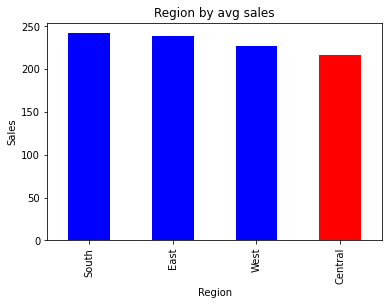

In [ ]:
#region by number of sales
new_df=df.groupby(by="Region")["Sales"].mean().sort_values(ascending=False)
print(new_df)
#plotting the graph
new_df.plot(kind="bar",color=["blue", "blue", "blue", "red"])
plt.ylabel('Sales')
plt.title('Region by avg sales');


Region
West       33.927281
East       32.163905
South      28.857673
Central    17.100421
Name: Profit, dtype: float64


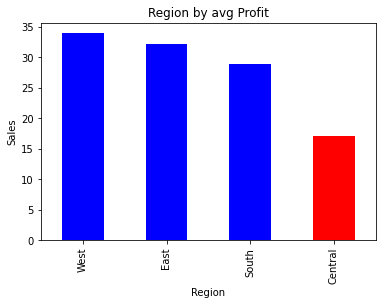

In [ ]:
#region by number of profit
new_df=df.groupby(by="Region")["Profit"].mean().sort_values(ascending=False)
print(new_df)
#plotting the graph
new_df.plot(kind="bar",color=["blue", "blue", "blue", "red"])
plt.ylabel('Sales')
plt.title('Region by avg Profit');

The `Central` Region is showing lowest sales & profit ( lower than the avg sales of the country) so our main focus will be on the Central Region as the problem is to find the weak area

Lets check `State` with lowest number of sales in the `Central` Region

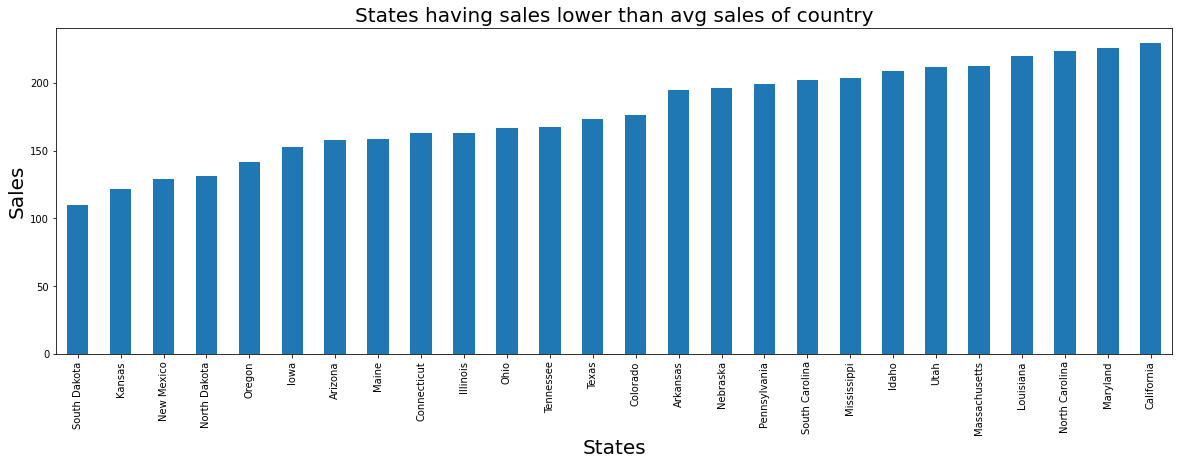

In [ ]:
#state by lowest avg. sales
Avg_Sales=230.15 #avg sales of the country
plt.figure(figsize=(20,6))
new_df=df[df['Region']=="Central"] # since we are interested in the Central 
new_df=df.groupby(by="State")["Sales"].mean().sort_values(ascending=True)
new_df=new_df[new_df.values<Avg_Sales] #since we want states with sales lower than avg.

#plotting the graph
new_df.plot(kind="bar")
plt.xlabel('States',size="20")
plt.ylabel('Sales',size="20")
plt.title('States having sales lower than avg sales of country',size="20");



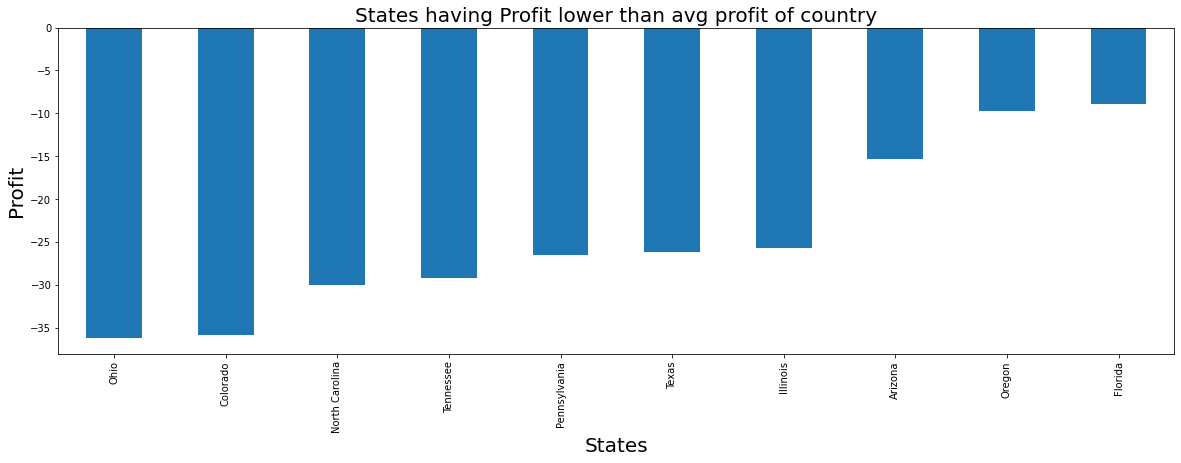

In [ ]:
#state by lowest avg. profit
Avg_Sales=29.70
plt.figure(figsize=(20,6))
new_df=df[df['Region']=="Central"] # since we are interested in the Central 
new_df=df.groupby(by="State")["Profit"].mean().sort_values(ascending=True)
new_df=new_df[new_df.values<Avg_Sales] #since we want states with sales lower than avg.

#plotting the graph
new_df.plot(kind="bar")
plt.xlabel('States',size="20")
plt.ylabel('Profit',size="20")
plt.title('States having Profit lower than avg profit of country',size="20");

So above all are the states with sales & lower than the country average sales & average profit respectively

Lets see sales by city having lower sales than the avg sales & profit


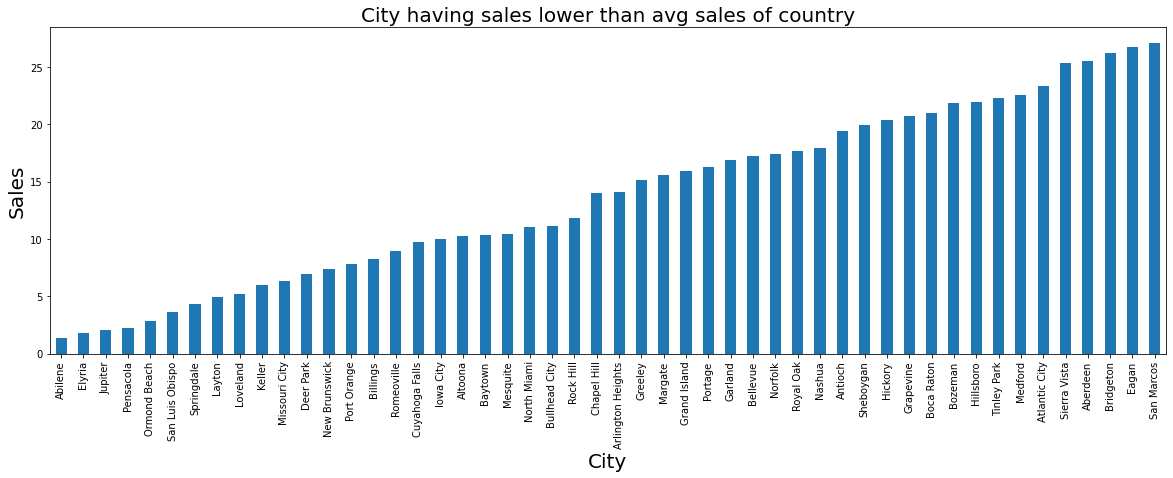

In [ ]:
#sales by city
plt.figure(figsize=(20,6))
new_df=df[df['Region']=="Central"]
new_df=df.groupby(by="City")["Sales"].mean().sort_values(ascending=True)


#plotting the graph
new_df[:50].plot(kind="bar")
plt.xlabel('City',size="20")
plt.ylabel('Sales',size="20")
plt.title('City having sales lower than avg sales of country',size="20");


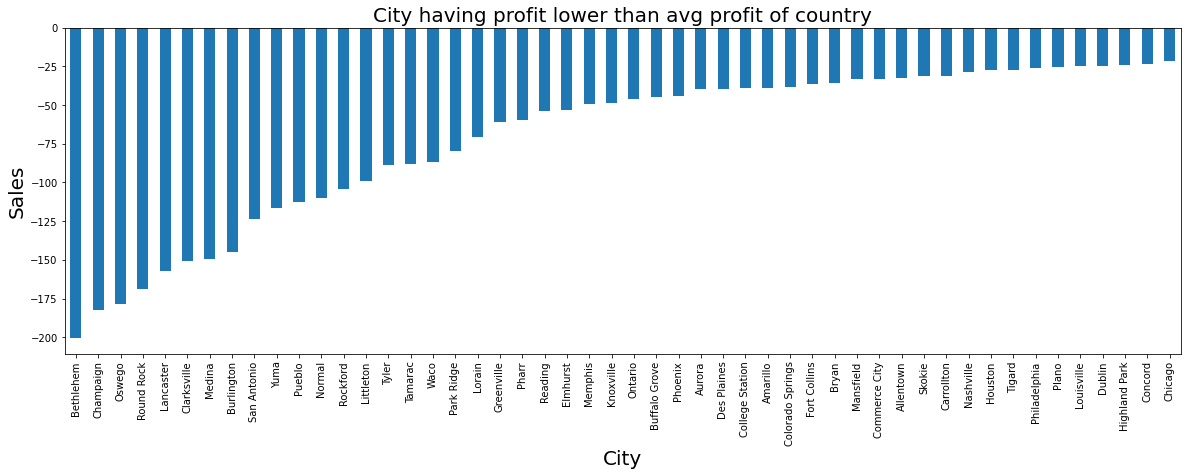

In [ ]:
#profit by city
plt.figure(figsize=(20,6))
new_df=df[df['Region']=="Central"]
new_df=df.groupby(by="City")["Profit"].mean().sort_values(ascending=True)

#plotting the graph
new_df[:50].plot(kind="bar")
plt.xlabel('City',size="20")
plt.ylabel('Sales',size="20")
plt.title('City having profit lower than avg profit of country',size="20");

All above are the cities having lower sales & profit in the Central Region

__Lets see the reason behind these low sales in Central Region and all these States and Cities__

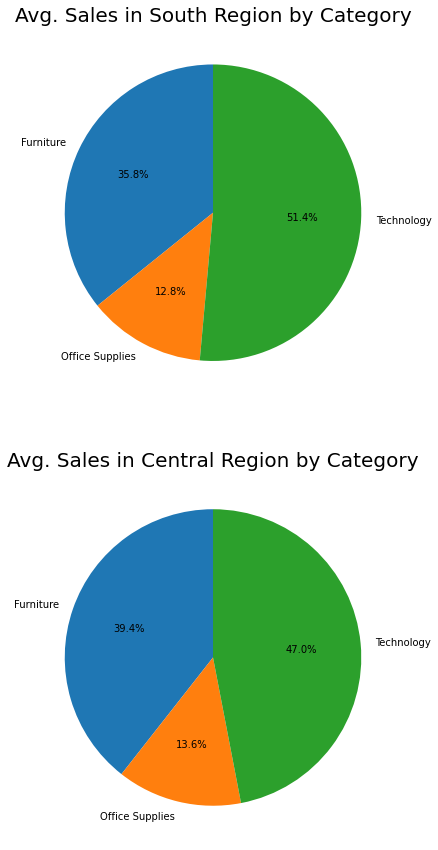

In [ ]:
#category by sales
plt.figure(figsize=(20,15))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Category")["Sales"].mean()
lowest_df=lowest_df.groupby(by="Category")["Sales"].mean()

#plotting the graph
highest_df.plot.pie(autopct="%.1f%%",ax=ax0,startangle=90)
ax0.set_ylabel(None)
ax0.set_title('Avg. Sales in South Region by Category',size="20")
lowest_df.plot.pie(autopct="%.1f%%",ax=ax1,startangle=90)
ax1.set_ylabel(None)
ax1.set_title('Avg. Sales in Central Region by Category',size="20");

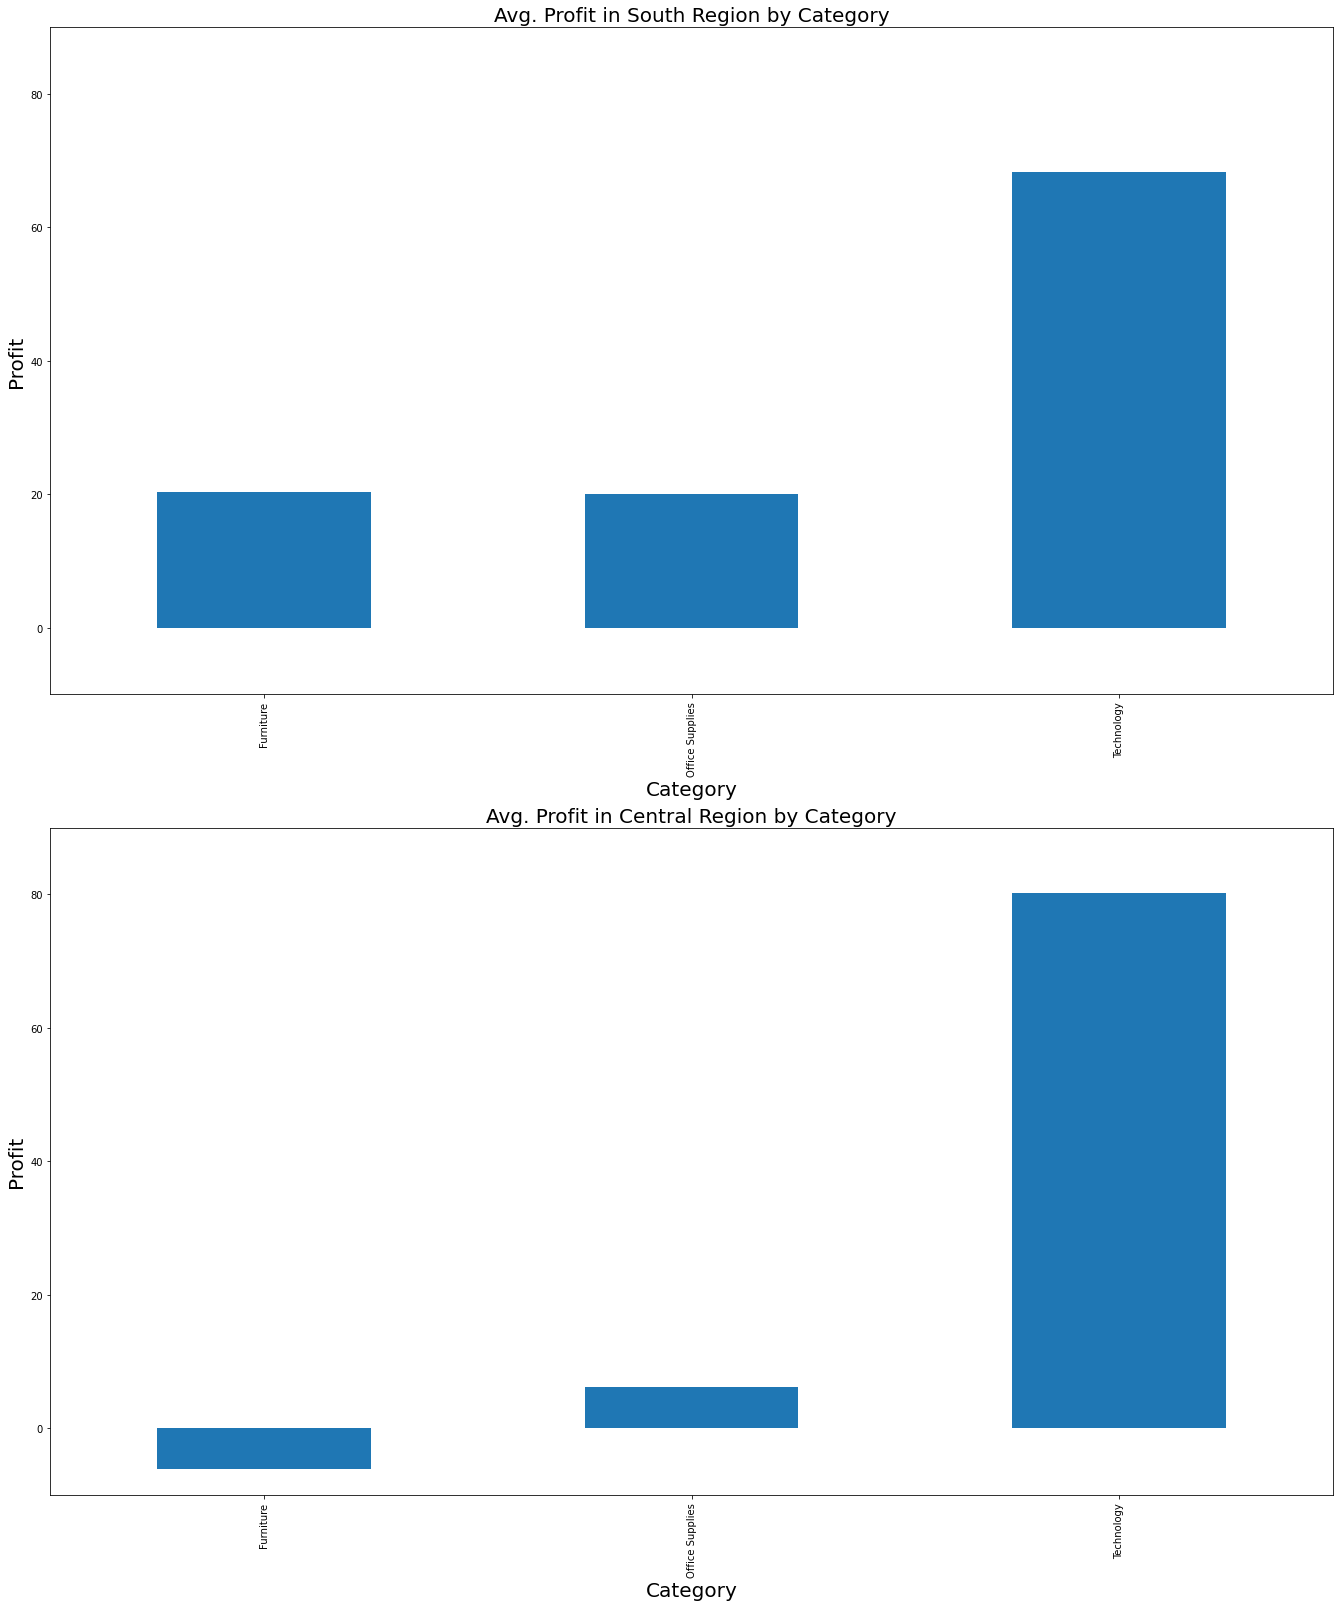

In [ ]:
#category by profit
plt.figure(figsize=(23,27))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Category")["Profit"].mean()
lowest_df=lowest_df.groupby(by="Category")["Profit"].mean()

#plotting the graph
highest_df.plot(kind='bar',ax=ax0)
ax0.set_ylim(-10,90)
ax0.set_xlabel('Category',size="20")
ax0.set_ylabel('Profit',size="20")
ax0.set_title('Avg. Profit in South Region by Category',size="20")
lowest_df.plot(kind='bar',ax=ax1)
ax1.set_ylim(-10,90)
ax1.set_xlabel('Category',size="20")
ax1.set_ylabel('Profit',size="20")
ax1.set_title('Avg. Profit in Central Region by Category',size="20");

So there is not much difference in the proportion of Sales by category of  both the region but the profit is less in `furniture` and `office supplies` 

Lets see the difference between sub-category

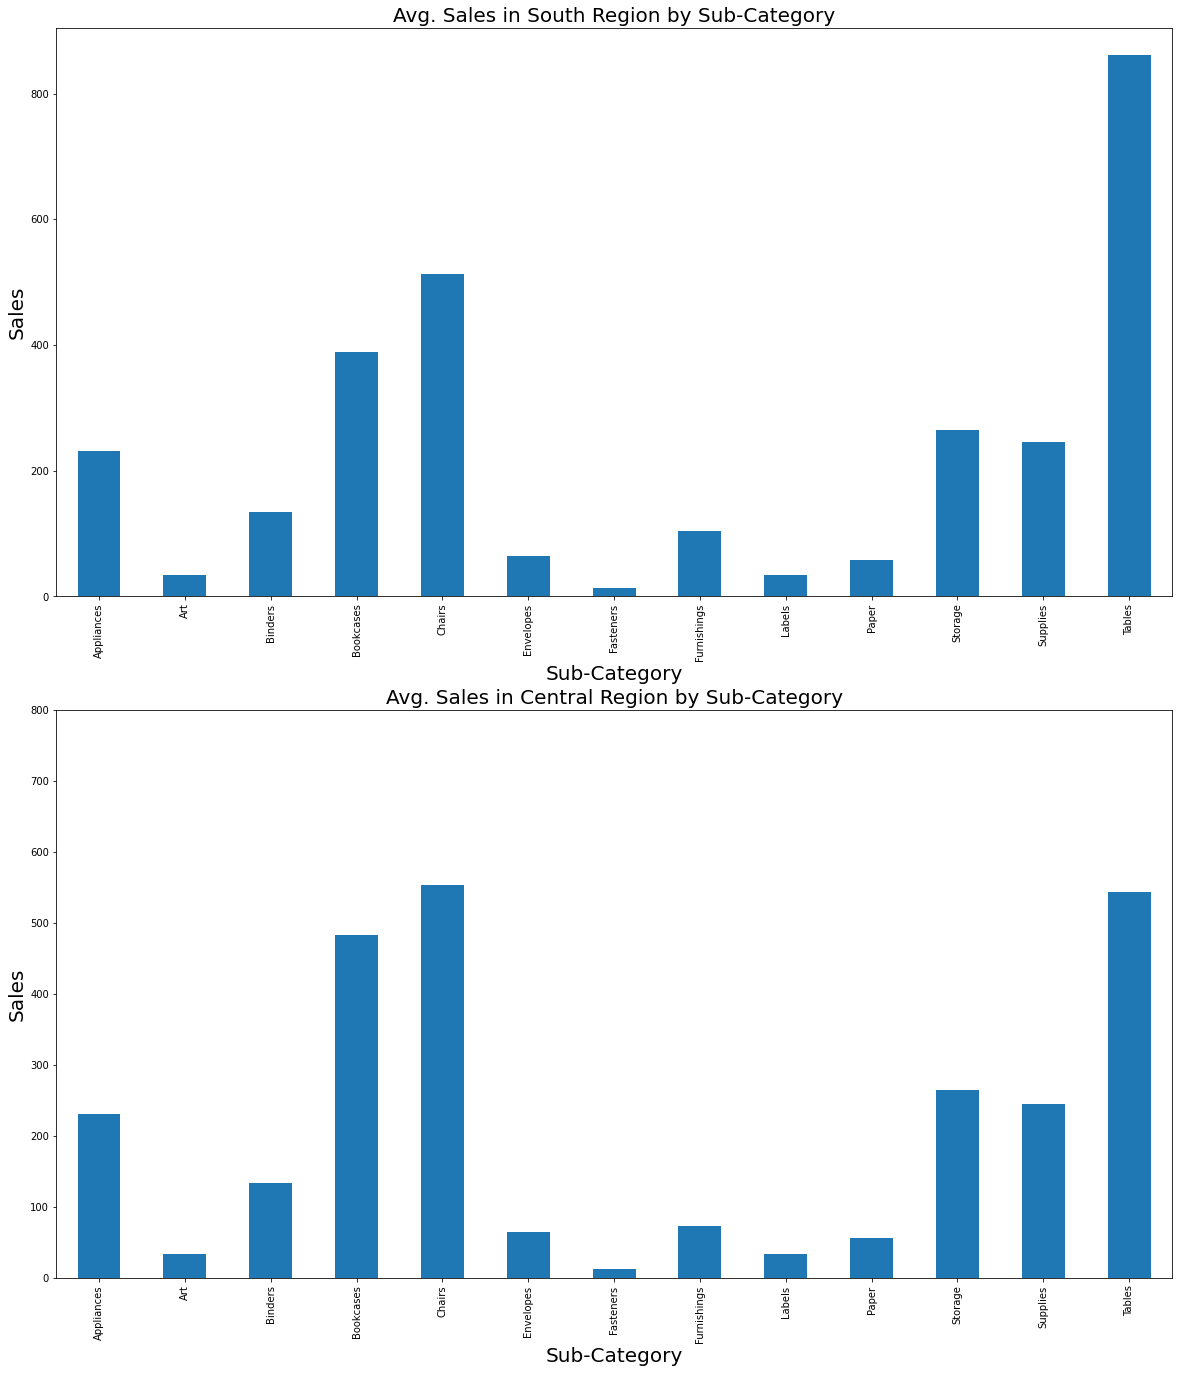

In [ ]:
#sub-category by sales
plt.figure(figsize=(20,23))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df.query('Region=="Central" & Category=="Furniture" | Category=="Office Supplies"') 
#since it is the region with least sales and furntiure and office supplies is having low sales
highest_df=df.query('Region=="South" & Category=="Furniture" | Category=="Office Supplies"')
#since it is the region with most sales and office supplies is having low sales
highest_df=highest_df.groupby(by="Sub-Category")["Sales"].mean()
lowest_df=lowest_df.groupby(by="Sub-Category")["Sales"].mean()

#plotting the graph
highest_df.plot(kind="bar",ax=ax0)
ax0.set_title('Avg. Sales in South Region by Sub-Category',size="20")
ax0.set_xlabel('Sub-Category',size="20")
ax0.set_ylabel("Sales",size="20")
lowest_df.plot(kind="bar",ax=ax1)
ax1.set_title('Avg. Sales in Central Region by Sub-Category',size="20")
ax1.set_xlabel('Sub-Category',size="20")
ax1.set_ylabel("Sales",size="20")
ax1.set_ylim(0,800);

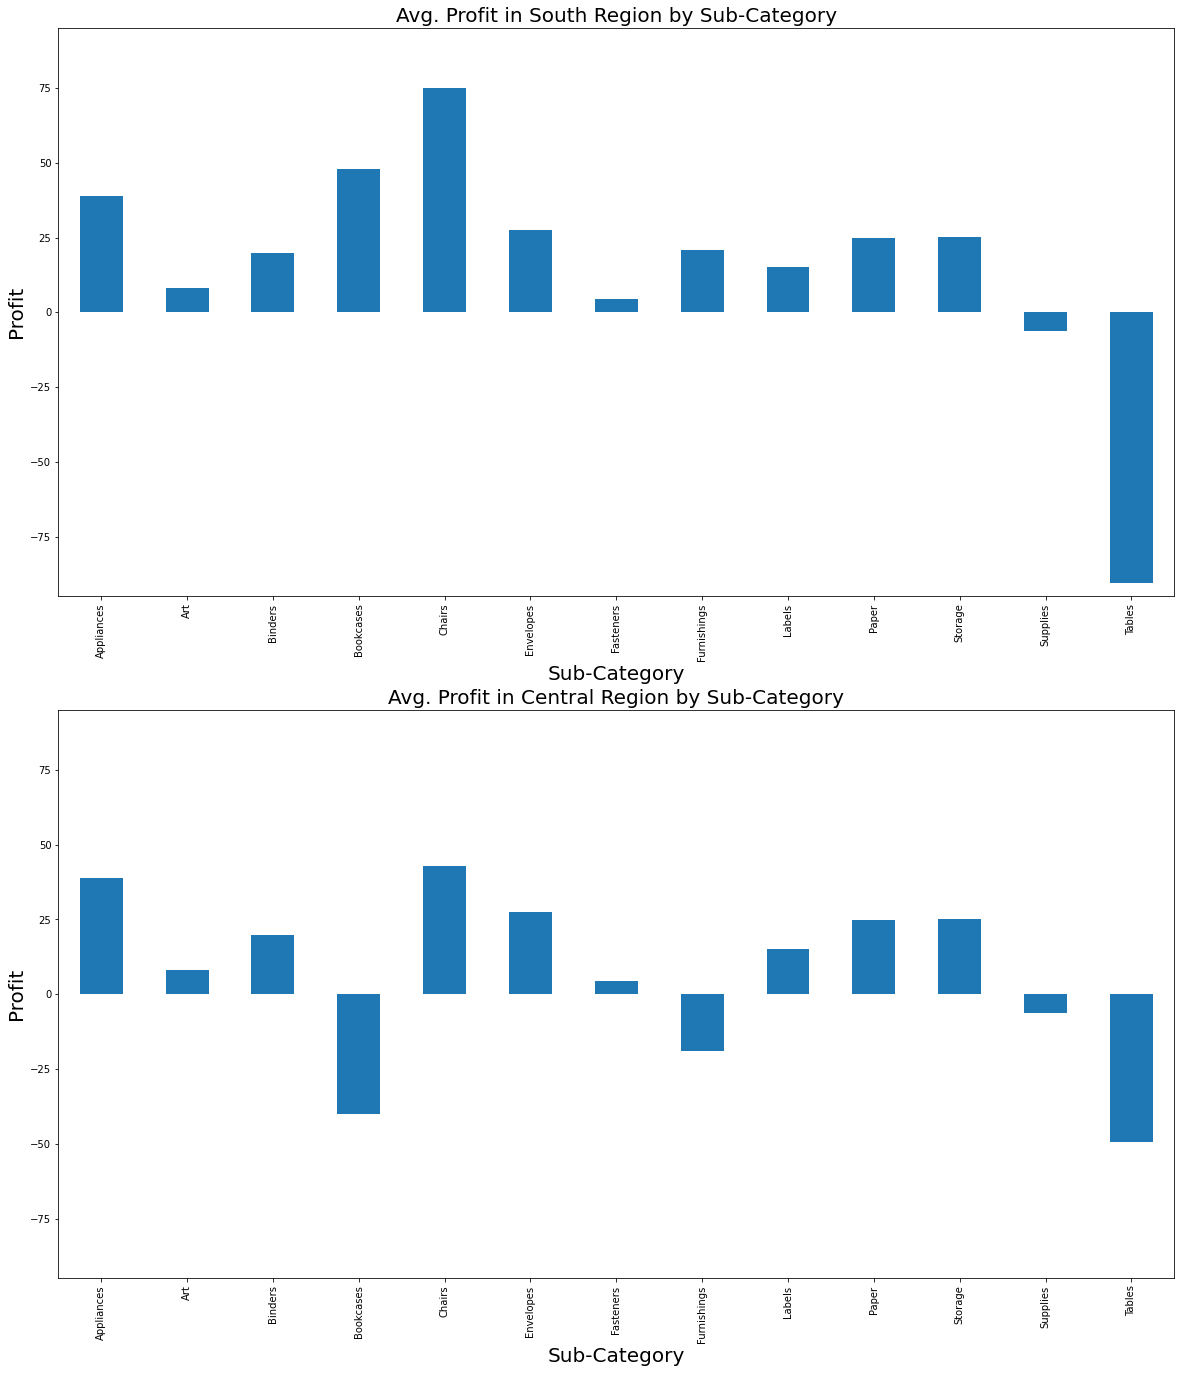

In [ ]:
#profit by sub-category
plt.figure(figsize=(20,23))
ax0=plt.subplot(211)
ax1=plt.subplot(212)
lowest_df=df.query('Region=="Central" & Category=="Furniture" | Category=="Office Supplies"') 
#since it is the region with least sales and furntiure and office supplies is having low sales
highest_df=df.query('Region=="South" & Category=="Furniture" | Category=="Office Supplies"')
#since it is the region with most sales and office supplies is having low sales
highest_df=highest_df.groupby(by="Sub-Category")["Profit"].mean()
lowest_df=lowest_df.groupby(by="Sub-Category")["Profit"].mean()

#plotting the graph
highest_df.plot(kind="bar",ax=ax0)
ax0.set_title('Avg. Profit in South Region by Sub-Category',size="20")
ax0.set_xlabel('Sub-Category',size="20")
ax0.set_ylabel("Profit",size="20")
ax0.set_ylim(-95,95)
lowest_df.plot(kind="bar",ax=ax1)
ax1.set_title('Avg. Profit in Central Region by Sub-Category',size="20")
ax1.set_ylim(-95,95)
ax1.set_xlabel('Sub-Category',size="20")
ax1.set_ylabel("Profit",size="20");

The sales & profit of `Tables`  is low in the Central region

`Bookcases` & `Furnishings` profit is in negative in Central region


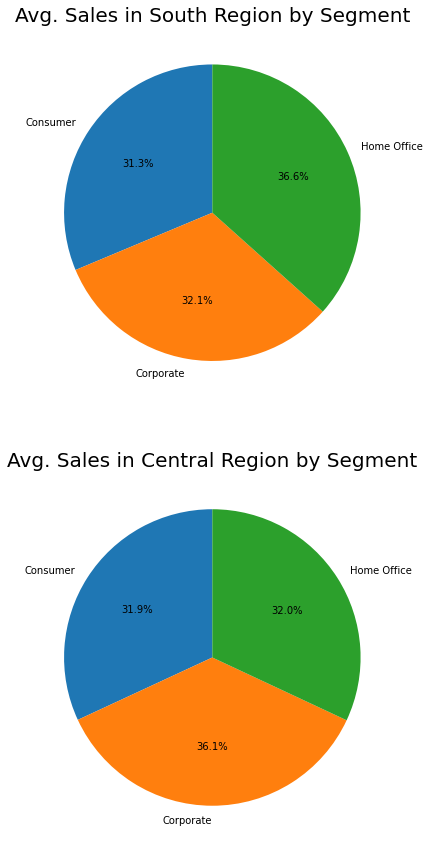

In [ ]:
#segment by sales
plt.figure(figsize=(20,15))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Segment")["Sales"].mean()
lowest_df=lowest_df.groupby(by="Segment")["Sales"].mean()

#plotting the graph
highest_df.plot.pie(autopct="%.1f%%",ax=ax0,startangle=90);
ax0.set_ylabel(None)
ax0.set_title('Avg. Sales in South Region by Segment',size="20")
lowest_df.plot.pie(autopct="%.1f%%",ax=ax1,startangle=90);
ax1.set_ylabel(None)
ax1.set_title('Avg. Sales in Central Region by Segment',size="20");

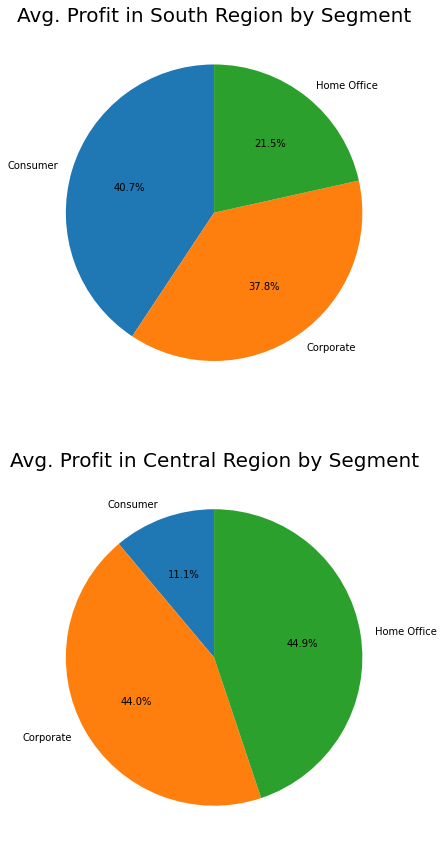

In [ ]:
#segment by profit
plt.figure(figsize=(20,15))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Segment")["Profit"].mean()
lowest_df=lowest_df.groupby(by="Segment")["Profit"].mean()

#plotting the graph
highest_df.plot.pie(autopct="%.1f%%",ax=ax0,startangle=90)
ax0.set_ylabel(None)
ax0.set_title('Avg. Profit in South Region by Segment',size="20")
lowest_df.plot.pie(autopct="%.1f%%",ax=ax1,startangle=90)
ax1.set_ylabel(None)
ax1.set_title('Avg. Profit in Central Region by Segment',size="20");

There is no Segment-wise difference in sales between these two regions but avg. profit of `Home Office` & `Consumer` is low 

Sales by Ship modes

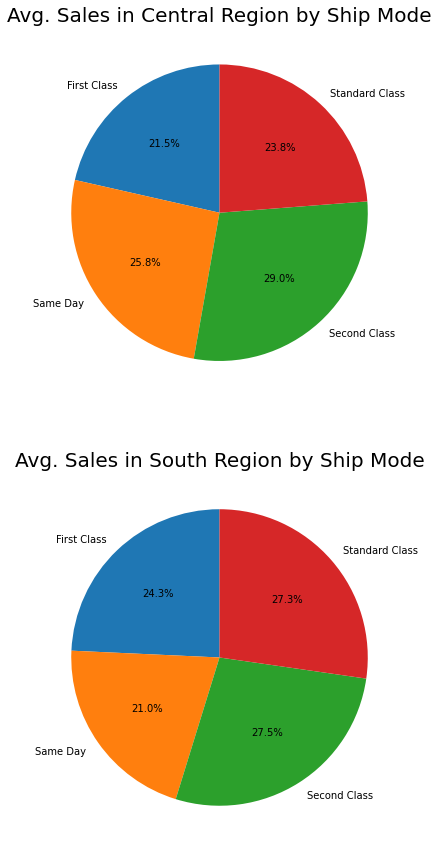

In [ ]:
#shipmodes by sales
plt.figure(figsize=(20,15))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Ship Mode")["Sales"].mean()
lowest_df=lowest_df.groupby(by="Ship Mode")["Sales"].mean()

#plotting the graph
highest_df.plot.pie(autopct="%.1f%%",ax=ax0,startangle=90);
ax0.set_ylabel(None)
ax0.set_title('Avg. Sales in Central Region by Ship Mode',size="20")
lowest_df.plot.pie(autopct="%.1f%%",ax=ax1,startangle=90);
ax1.set_ylabel(None)
ax1.set_title('Avg. Sales in South Region by Ship Mode',size="20");

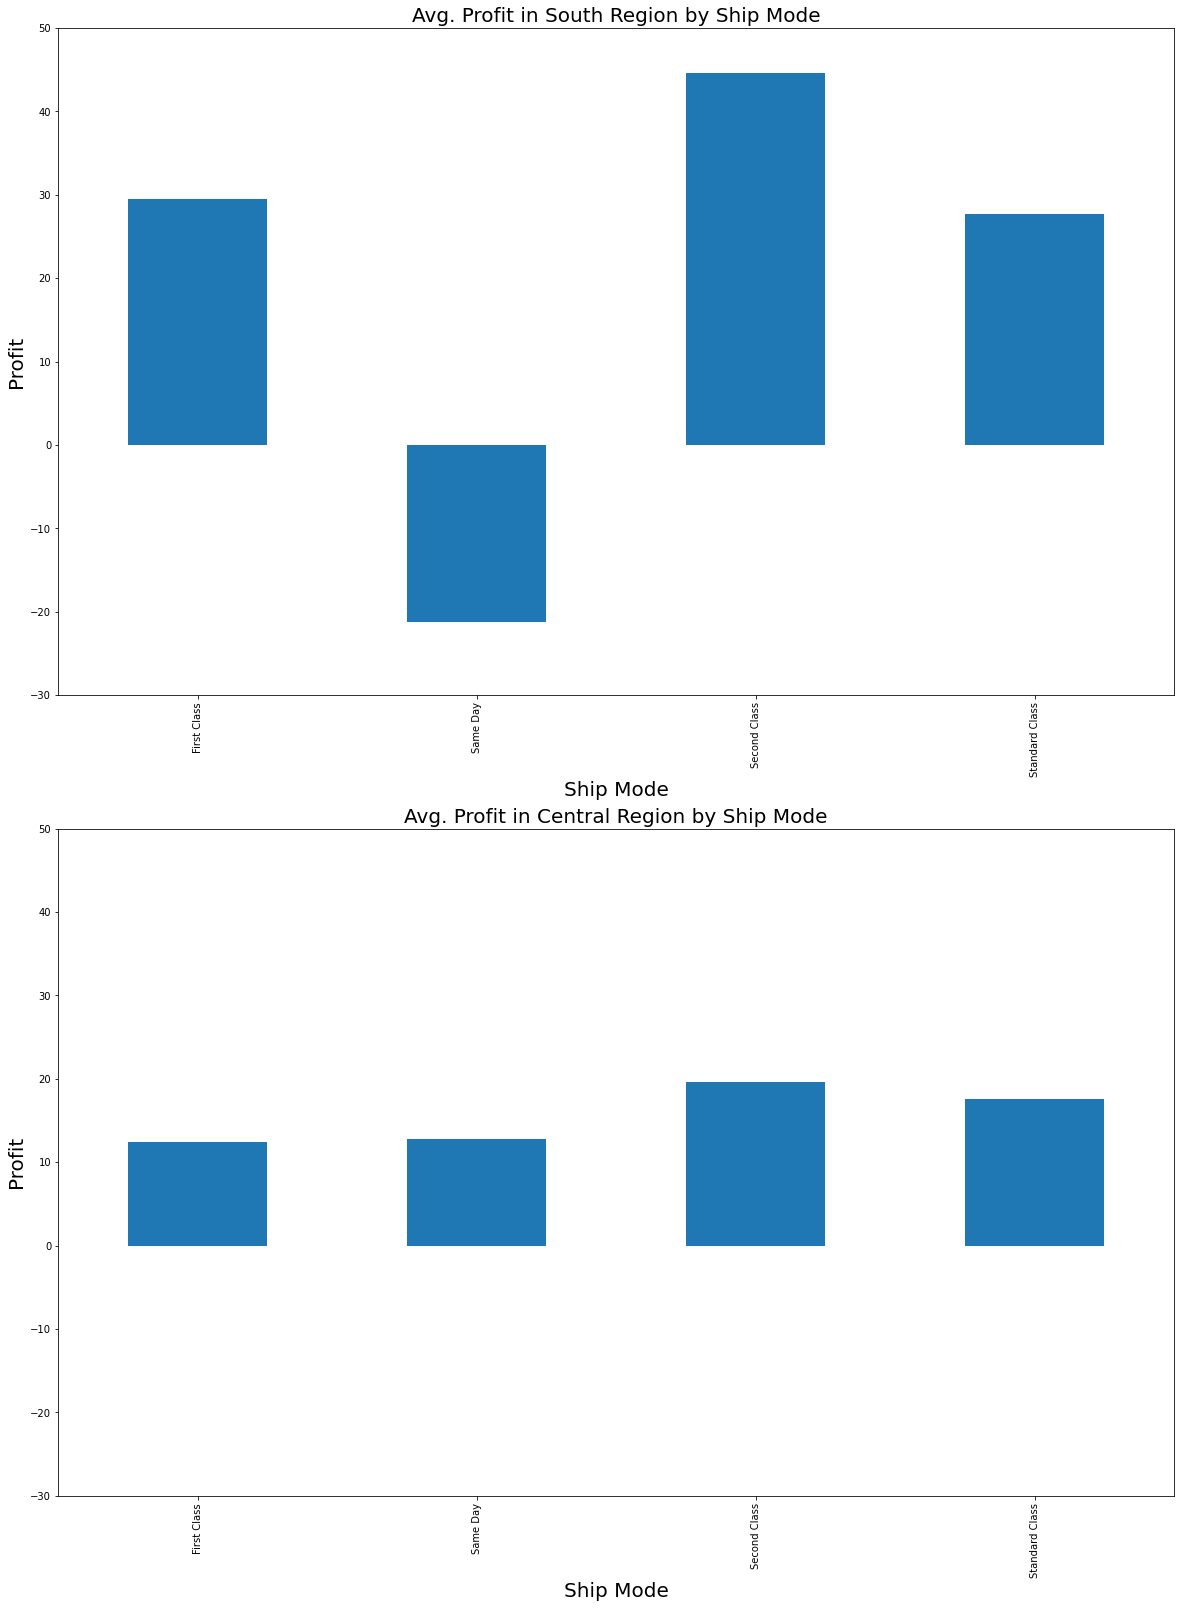

In [ ]:
#shipmodes by profit
plt.figure(figsize=(20,27))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Ship Mode")["Profit"].mean()
lowest_df=lowest_df.groupby(by="Ship Mode")["Profit"].mean()

#plotting the graph
highest_df.plot(kind="bar",ax=ax0)
ax0.set_title('Avg. Profit in South Region by Ship Mode',size="20")
ax0.set_xlabel('Ship Mode',size="20")
ax0.set_ylabel('Profit', size="20")
ax0.set_ylim(-30,50);
lowest_df.plot(kind="bar",ax=ax1)
ax1.set_title('Avg. Profit in Central Region by Ship Mode',size="20")
ax1.set_xlabel('Ship Mode',size="20")
ax1.set_ylabel('Profit', size="20")
ax1.set_ylim(-30,50);

There is not much diffeence in Sales in terms of ship mode they used yes but the ship mode in `same day` of South Region is showing loss in profit

Lets find impact of discount on Sales of regions

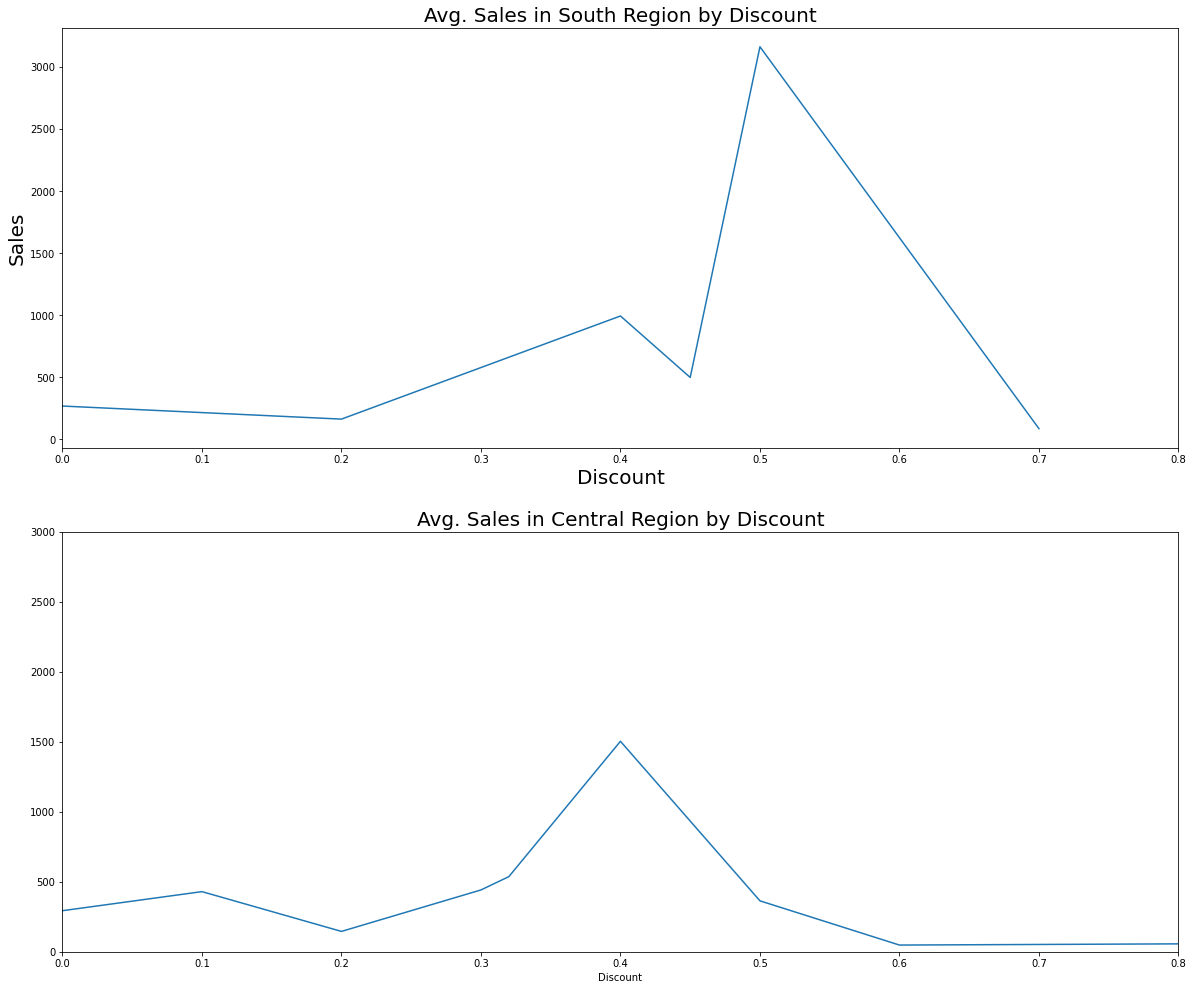

In [ ]:
#sales by discounts
plt.figure(figsize=(20,17))
ax0=plt.subplot(211)
ax1=plt.subplot(212)

lowest_df=df[df['Region']=="Central"] #since it is the region with least sales
highest_df=df[df['Region']=='South'] #since it is the region with most sales
highest_df=highest_df.groupby(by="Discount")["Sales"].mean()
lowest_df=lowest_df.groupby(by="Discount")["Sales"].mean()

#plotting the graph
highest_df.plot(kind="line",ax=ax0)
ax0.set_xlabel('Discount',size="20")
ax0.set_ylabel('Sales',size="20")
ax0.set_xlim(0,0.8)
ax0.set_title('Avg. Sales in South Region by Discount',size="20")
lowest_df.plot(kind="line",ax=ax1)
ax1.set_title('Avg. Sales in Central Region by Discount',size="20")
ax1.set_xlim(0,0.8)
ax0.set_xlabel('Discount',size="20")
ax0.set_ylabel('Sales',size="20")
ax1.set_ylim(0,3000);

From the above plots it ia clear that Central Region is giving less discounts in comparison with South Region 

### Conlusion 
#### Insights
1. The `Central` Region is showing __lowest sales & profit__ ( lower than the avg sales of the country)
2. The profit is less in `furniture` and `office supplies`
3. The __sales & profit__ of `Tables` is low in the `Central` region. Also `Bookcases` & `Furnishings` going in loss in `Central` region
4. The avg. profit of `Home Office` & `Consumer` is low in `Central` Region
5. `Central` Region is __giving less discounts__ in comparison with `South` Region (which is the highest sales region)

#### Other Insights
- The ship mode in `same day` of `South` Region is making loss 

### Recommendations
- `Superstore` needs to increase their discounts to boost up the market in the `Central` Region
- Marketing teams should consider `Furniture` and `Office Supplies` Category while thinking about a new Sales campaign
- Also Superstore can start advertising about their `Bookcases`, `Furnishing`, `Tables` products to the customer from `Home Office` & `Consumer` lets say the quality and reliability and give special offer for bulk purchase or Home office kit.

## Thank You.